In [1]:
%pip install plotly
%pip install pandas
%pip install nbformat --upgrade
%pip install numpy
%pip install lifetimes
%pip install --upgrade matplotlib
%pip install seaborn
# Install squarify for treemap plot
%pip install squarify
'''pip install numpy
pip install lifetimes
pip install --upgrade matplotlib
pip install seaborn
pip install scikit-learn'''

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


'pip install numpy\npip install lifetimes\npip install --upgrade matplotlib\npip install seaborn\npip install scikit-learn'

In [2]:

import pandas as pd
from datetime import datetime as dt
from datetime import timedelta
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import squarify


# Data Wrangling

In [3]:
data = pd.read_csv('C:\\Users\\Admin\\OneDrive\\Desktop\\Jupyter\\Online Retail\\online_retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
data.dropna(subset = ['CustomerID'], inplace = True)

In [6]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['TotalAmount'] = (data['Quantity'] * data['UnitPrice']).astype('Float64').round(2)

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [8]:
reference_date = pd.Timestamp(dt.now().date())
#reference_date

In [9]:
reference_date = data['InvoiceDate'].max() + timedelta(days = 1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   TotalAmount  406829 non-null  Float64       
dtypes: Float64(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 31.4+ MB


In [11]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64

In [12]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
count,406829.000000,406829,406829.000000,406829.000000,406829.0
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,20.401854
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.6
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,4.2
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,11.1
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,19.5
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.6
std,248.693370,NaN,69.315162,1713.600303,427.591718


In [13]:
data.shape

(406829, 9)

In [14]:
#number of unique products
print(data['Description'].nunique())

3896


In [15]:
#number of each products
data['Description'].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
Name: count, dtype: int64

In [16]:
#The most ordered product
data.groupby("Description").agg({"Quantity" : "sum"}).head()


,Quantity
Description,
4 PURPLE FLOCK DINNER CANDLES,140
50'S CHRISTMAS GIFT BAG LARGE,1883
DOLLY GIRL BEAKER,2391
I LOVE LONDON MINI BACKPACK,360
I LOVE LONDON MINI RUCKSACK,1


In [17]:
#Number of invoices were issued in total
data['InvoiceNo'].nunique()

22190

In [18]:
# Total Price that was paid per invoice
## return Price to float
data['TotalAmount']

0          15.3
1         20.34
2          22.0
3         20.34
4         20.34
          ...  
541904     10.2
541905     12.6
541906     16.6
541907     16.6
541908    14.85
Name: TotalAmount, Length: 406829, dtype: Float64

In [19]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
count,406829.000000,406829,406829.000000,406829.000000,406829.0
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,20.401854
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.6
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,4.2
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,11.1
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,19.5
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.6
std,248.693370,NaN,69.315162,1713.600303,427.591718


In [20]:
# คอลัมน์ Price , Quantity มีข้อมูลที่เป็นลบ
print(f"Total 'Quantity' column less than 0: {np.sum(data['Quantity'] <= 0)} row")
print(f"Total 'TotalAmount' column less than 0: {np.sum(data['TotalAmount'] <= 0)} row")

Total 'Quantity' column less than 0: 8905 row
Total 'TotalAmount' column less than 0: 8949 row


In [21]:
#data[data['Quantity'] <= 0]
data[data['TotalAmount'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.5
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.8
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [22]:
data = data[data['Quantity'] >= 0]

In [23]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
count,397924.000000,397924,397924.000000,397924.000000,397924.0
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171,22.394748
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.0
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.68
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.8
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.8
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.6
std,180.420210,NaN,22.096788,1713.169877,309.055588


In [24]:
# The maximum and minimum of 'Quantity' and 'UnitPrice' are too far
# Replace with quartile method
for col in ['Quantity', 'UnitPrice']:
    data_quartile = sorted(data[col])
    Q1, Q3 = np.percentile(data_quartile, [0.01, 0.99])
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    data[data_quartile] = np.where(data[col] > upper_limit, upper_limit, data[col])
    data[data_quartile] = np.where(data[col] < lower_limit, lower_limit, data[col])


C:\Users\Admin\AppData\Local\Temp\ipykernel_40652\3486996870.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[data_quartile] = np.where(data[col] > upper_limit, upper_limit, data[col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_40652\3486996870.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[data_quartile] = np.where(data[col] > upper_limit, upper_limit, data[col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_40652\3486996870.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

In [25]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount,1,2,3,4,5,...,1867.86,2033.1,2053.07,2118.74,2382.92,2500.0,3155.95,3949.32,4161.06,8142.75
count,397924.000000,397924,397924.000000,397924.000000,397924.0,3.979240e+05,3.979240e+05,3.979240e+05,397924.00,397924.00,...,397924.00,397924.00,397924.00,3.979240e+05,3.979240e+05,3.979240e+05,3.979240e+05,3.979240e+05,3.979240e+05,3.979240e+05
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171,22.394748,1.950000e+00,2.100000e+00,2.080000e+00,1.25,1.25,...,3.75,3.75,3.75,1.950000e+00,1.950000e+00,4.150000e+00,8.500000e-01,2.100000e+00,4.150000e+00,4.950000e+00
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.0,1.950000e+00,2.100000e+00,2.080000e+00,1.25,1.25,...,3.75,3.75,3.75,1.950000e+00,1.950000e+00,4.150000e+00,8.500000e-01,2.100000e+00,4.150000e+00,4.950000e+00
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.68,1.950000e+00,2.100000e+00,2.080000e+00,1.25,1.25,...,3.75,3.75,3.75,1.950000e+00,1.950000e+00,4.150000e+00,8.500000e-01,2.100000e+00,4.150000e+00,4.950000e+00
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.8,1.950000e+00,2.100000e+00,2.080000e+00,1.25,1.25,...,3.75,3.75,3.75,1.950000e+00,1.950000e+00,4.150000e+00,8.500000e-01,2.100000e+00,4.150000e+00,4.950000e+00
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.8,1.950000e+00,2.100000e+00,2.080000e+00,1.25,1.25,...,3.75,3.75,3.75,1.950000e+00,1.950000e+00,4.150000e+00,8.500000e-01,2.100000e+00,4.150000e+00,4.950000e+00
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.6,1.950000e+00,2.100000e+00,2.080000e+00,1.25,1.25,...,3.75,3.75,3.75,1.950000e+00,1.950000e+00,4.150000e+00,8.500000e-01,2.100000e+00,4.150000e+00,4.950000e+00
std,180.420210,NaN,22.096788,1713.169877,309.055588,1.554314e-15,1.332269e-15,1.332269e-15,0.00,0.00,...,0.00,0.00,0.00,1.554314e-15,1.554314e-15,2.664539e-15,6.661347e-16,1.332269e-15,2.664539e-15,4.440898e-15


# RFM Model 
'''
Recency : ลูกค้าที่สั่งซื้อสินค้าล่าสุดวันนี้ จะได้ R Score > ลูกค้าที่สั่งซื้อสินค้าล่าสุดเมื่อ 3 ปีที่แล้ว
Frequency : ลูกค้าที่สั่งซื้อสินค้าบ่อยที่สุดในร้าน จะได้ F Score > ลูกค้าmujสั่งซื้อสินค้าน้อยครั้งที่สุดในร้าน
Monetary : ลูกค้าที่ช้จ่ายเยอะที่สุดในร้าน จะได้ M Score > ลูกค้าที่ใช้จ่ายน้อยที่สุดในร้าน
'''

In [26]:
#ทำRFM Analysis โดย group by Customer ID
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (reference_date - x.max()).days,
    'InvoiceNo' : 'count',
    'TotalAmount' : 'sum'
})

In [27]:
#ทำตารางRFM
rfm.rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo' : 'Frequency',
                      'TotalAmount' : 'Monetary'}, inplace = True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.6
12347.0,2,182,4310.0
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.4


In [28]:
# Create binning for 5 bins
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method = 'first'),
                                  5, labels = [1, 2, 3, 4, 5])
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels = [5, 4, 3, 2, 1])
rfm.head(5)

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.6,1,1,1
12347.0,2,182,4310.0,5,5,1
12348.0,75,31,1797.24,2,3,2
12349.0,19,73,1757.55,4,4,2
12350.0,310,17,334.4,1,2,4


In [ ]:
#ระบุ Quantiles
'''
quantiles = rfm.quantile(q = [0.25, 0.50, 0.75])

#จัดคะแนนตามRFM
# x คือ ค่าที่จะกลายเป็นscore ในRFM
# p คือ column name ในRFM
# d คือ data frame ที่เก็บquantiles
def RScore(x, p, d):
    #Recency
    if (p == 'Recency'):
        if (x <= d[p][0.25]):
            return 4
        elif (x <= d[p][0.50]):
            return 3
        elif (x <= d[p][0.75]):
            return 2
        else:
            return 1
    # Frequency, Monetery
    else:
        if (x <= d[p][0.25]):
            return 1
        elif (x <= d[p][0.50]):
            return 2
        elif (x <= d[p][0.75]):
            return 3
        else:
            return 4


rfm['R'] = rfm['Recency'].apply(RScore, args = ('Recency', quantiles, ))
rfm['F'] = rfm['Frequency'].apply(RScore, args = ('Frequency', quantiles, ))
rfm['M'] = rfm['Monetary'].apply(RScore, args = ('Monetary', quantiles, ))
'''

In [31]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.6,1,1,1,111,3
12347.0,2,182,4310.0,5,5,1,551,11
12348.0,75,31,1797.24,2,3,2,232,7
12349.0,19,73,1757.55,4,4,2,442,10
12350.0,310,17,334.4,1,2,4,124,7


In [30]:
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)

In [ ]:

# RFM Score
rfm['rfmSegment'] = rfm['R'].astype(str) + rfm['F'].astype(str)
#rfm.drop(columns=['RFMScore'], inplace=True)
rfm.head(5)

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,rfmSegment
CustomerID,,,,,,,,,
12346.0,326,1,77183.6,1,1,1,111,3,11
12347.0,2,182,4310.0,5,5,1,551,11,55
12348.0,75,31,1797.24,2,3,2,232,7,23
12349.0,19,73,1757.55,4,4,2,442,10,44
12350.0,310,17,334.4,1,2,4,124,7,12


In [41]:
# Convert RFM Score to segment label
rfmLabel = {
    r'55': "Champion",
    r'[3-5][4-5]': "Loyal",
    r'[4-5][2-3]': "Promising",
    r'51': "New Customers",
    r'41': "Warm Leads",
    r'31': "Cold Leads",
    r'[2-3][2-3]': "Need Attention",
    r'[1-2][5]': "Shouldn't Lost",
    r'[1-2][3-4]': 'Sleepers',
    r'[1-2][1-2]': "Lost"
}

rfm['Segment'] = rfm['rfmSegment'].replace(rfmLabel, regex = True)

In [39]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,rfmSegment,Segment
CustomerID,,,,,,,,,,
12346.0,326,1,77183.6,1,1,1,111,3,11,Lost
12347.0,2,182,4310.0,5,5,1,551,11,55,Champion
12348.0,75,31,1797.24,2,3,2,232,7,23,Need Attention
12349.0,19,73,1757.55,4,4,2,442,10,44,Loyal
12350.0,310,17,334.4,1,2,4,124,7,12,Lost


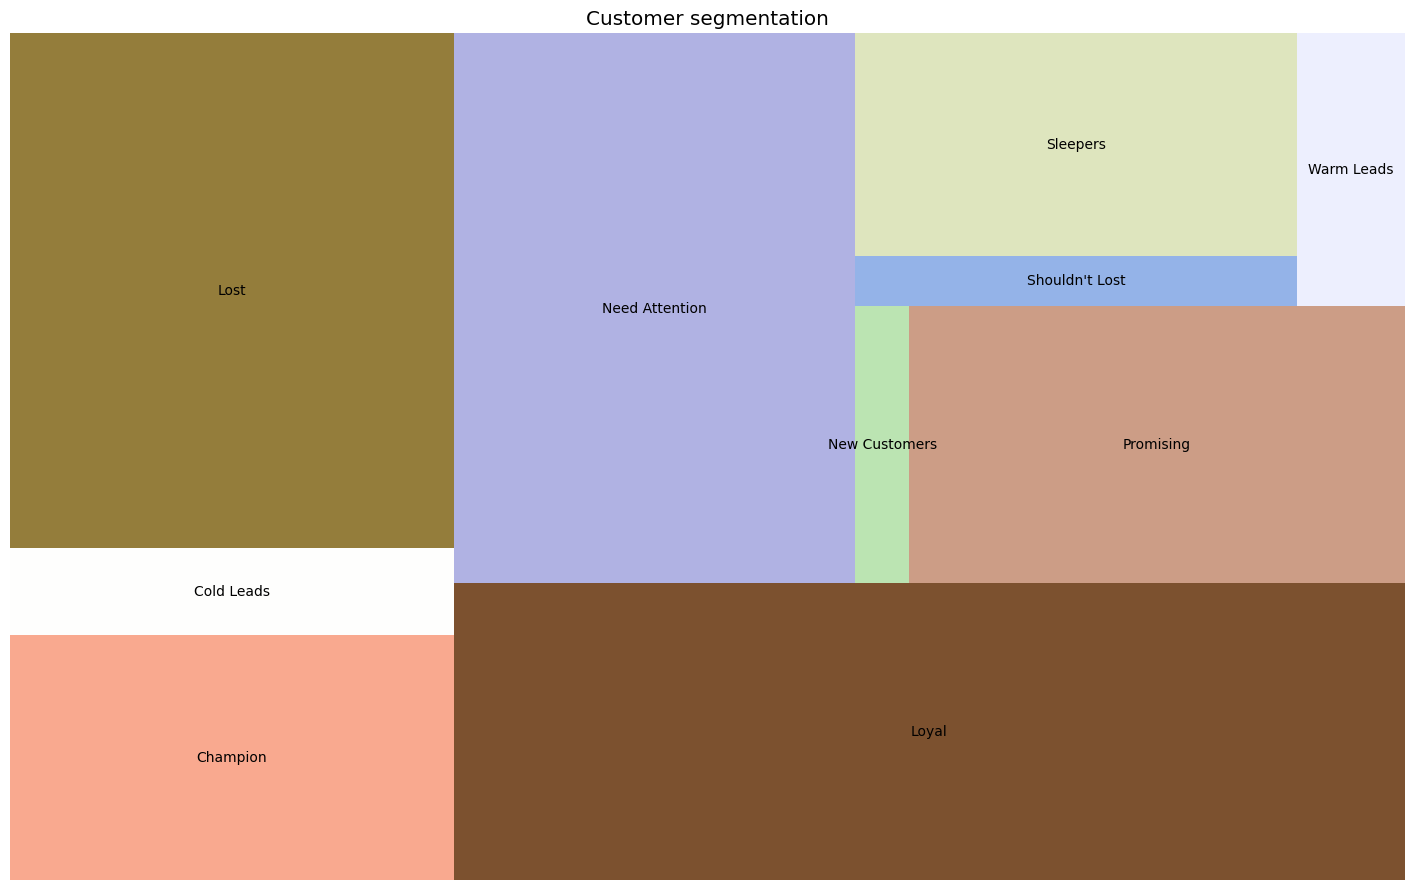

In [42]:
# RFM Result
result = rfm.groupby(['Segment'])['Segment'].count()
values = list(result)
labels = result.index

# Plot
colors = [list(np.random.uniform(size = 4)) for i in range(len(values))]

plt.figure(figsize = (18, 11))
with plt.style.context('ggplot'):
  squarify.plot(sizes = values, color = colors, label = labels)
  plt.axis('off')
  plt.title('Customer segmentation')
  plt.show()

In [ ]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Segment_Labels
CustomerID,,,,,,,,,
12346.0,326,2,0.0,1,1,1,111,3,Low-Value
12347.0,2,182,4310.0,4,4,4,444,12,High-Value
12348.0,75,31,1797.24,2,2,4,224,8,Mid-Value
12349.0,19,73,1757.55,3,3,4,334,10,High-Value
12350.0,310,17,334.4,1,1,2,112,4,Low-Value


In [50]:
vip_segment = rfm[rfm['Segment'] == "Loyal"]

In [58]:
fig = go.Figure()
fig.add_trace(go.Box(y = vip_segment['Recency'], name = "Recency"))
fig.add_trace(go.Box(y = vip_segment['Frequency'], name = "Frequency"))
fig.add_trace(go.Box(y = vip_segment['Monetary'], name = "Monetary"))


In [59]:
correlation_matrix = vip_segment[['R', 'F', 'M']].corr()

In [60]:
#Create Heatmap

fig_heatmap = go.Figure(data = go.Heatmap(
                    z = correlation_matrix.values,
                    x = correlation_matrix.columns,
                    y = correlation_matrix.columns,
                    colorscale = 'RdBu',
                    colorbar = dict(title = 'Correlation')))

fig_heatmap.update_layout(title = "Correlation Matrix of RFM Monetary within Loyal Segment")


#Show Heatmap

fig_heatmap.show()

In [43]:
data.to_csv("Cleaned_Data.csv", index = False)